In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import os
from math import * 
os.getcwd()
print("The current directory is: ")
print(os.getcwd())
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)
print("Moving up to the parent directory")
print(os.getcwd())

The current directory is: 
\\home.org.aalto.fi\nguyenb5\data\Desktop\Abaqus-Macromechanics-Project\notebooks
Moving up to the parent directory
\\home.org.aalto.fi\nguyenb5\data\Desktop\Abaqus-Macromechanics-Project


In [2]:
from stage0_configs import *
from modules.SOO_SIM import *
from modules.IO import *
from modules.calculation import *
from optimizers.optimize import *
from modules.hardeningLaws import *
info = main_config()


Welcome to the Abaqus parameter calibration project


The configurations you have chosen: 

+------------------------+-------------------+
|     Global Configs     |    User choice    |
+------------------------+-------------------+
|    SLURM iteration     |   one_node_small  |
| Number of initial sims |        200        |
|   Optimize strategy    |        MOO        |
|        Material        |    DP1000_400C    |
|     Hardening law      |     SwiftVoce     |
|      Curve index       |         1         |
|       Geometries       | NDBR50,NDBR6,CHD6 |
|     Optimizer name     |         BO        |
|   Deviation percent    |         2         |
+------------------------+-------------------+

Generating necessary directories

The path to your main project folder is

c:\Users\springnuance\Desktop\Abaqus-Macromechanics-Project



{'c1': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless', 'type': 'hardening'}, 'c2': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'K', 'unit': 'MPa', 'type': 'yielding'}, 'c3': {'lowerBound': 0, 'upperBound': 1, 'exponent': 0.1, 'name': 'e0', 'unit': 'dimensionless', 'type': 'hardening'}, 'c4': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless', 'type': 'hardening'}, 'c5': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'sigma_y', 'unit': 'MPa', 'type': 'yielding'}, 'c6': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'sigma_sat', 'unit': 'MPa', 'type': 'hardening'}, 'c7': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'b', 'unit': 'dimensionless', 'type': 'hardening'}}
[{'c1': 0.7065706570657065, 'c2': 252.6252625262526, 'c3': 0.06090609060906091, 'c4': 0.45364536453645365, 'c5': 1216.5216521652164, 'c6': 28.9028902890289, 'c7': 435.94359435943

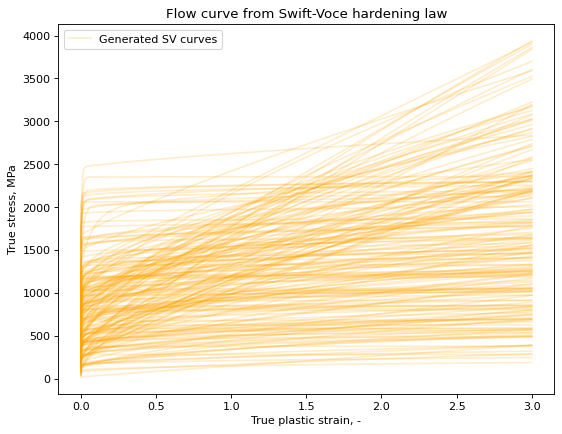

In [11]:
sim = SOO_SIM(info)
print(info['paramConfig'])
paramsDict = sim.latin_hypercube_sampling()
print(paramsDict)
truePlasticStrain = info['truePlasticStrain']
# Plot the flow curve
figure(figsize=(8, 6), dpi=80)
plt.title("Flow curve from Swift-Voce hardening law")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")
for param in paramsDict:
    trueStress = SwiftVoce(param["c1"], param["c2"], param["c3"], param["c4"], param["c5"], param["c6"], param["c7"], truePlasticStrain)
    plt.plot(truePlasticStrain, trueStress, color="orange", alpha=0.2)
plt.plot([], [], color="orange", alpha=0.2, label="Generated SV curves")
plt.legend()
np.save("parameters.npy", paramsDict)
print(len(paramsDict))

In [2]:
from stage0_configs import *
from modules.MOO_SIM import *
from modules.helper import *
from modules.hardeningLaws import *
info = main_config()

C:\Users\nguyenb5\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Welcome to Abaqus hardening parameter calibration project


The configurations you have chosen: 

+------------------------+-------------------+
|     Global Configs     |    User choice    |
+------------------------+-------------------+
|    SLURM iteration     |   one_node_small  |
| Number of initial sims |        200        |
|   Optimize strategy    |        MOO        |
|        Material        |     QP1000_25C    |
|     Hardening law      |     SwiftVoce     |
|      Curve index       |         1         |
|       Geometries       | NDBR25,NDBR6,CHD6 |
|     Optimizer name     |      BOTORCH      |
|   Deviation percent    |         2         |
+------------------------+-------------------+

Generating necessary directories

The path to your main project folder is

\\home.org.aalto.fi\nguyenb5\data\Desktop\Abaqus-Macromechanics-Project



{'c1': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'W', 'unit': 'dimensionless', 'type': 'hardening'}, 'c2': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'K', 'unit': 'MPa', 'type': 'yielding'}, 'c3': {'lowerBound': 0, 'upperBound': 1, 'exponent': 0.1, 'name': 'e0', 'unit': 'dimensionless', 'type': 'hardening'}, 'c4': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1.0, 'name': 'n', 'unit': 'dimensionless', 'type': 'hardening'}, 'c5': {'lowerBound': 0, 'upperBound': 2, 'exponent': 1000.0, 'name': 'sigma_y', 'unit': 'MPa', 'type': 'yielding'}, 'c6': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'sigma_sat', 'unit': 'MPa', 'type': 'hardening'}, 'c7': {'lowerBound': 0, 'upperBound': 1, 'exponent': 1000.0, 'name': 'b', 'unit': 'dimensionless', 'type': 'hardening'}}
[{'c1': 0.9416941694169417, 'c2': 1485.7485748574857, 'c3': 0.00216021602160216, 'c4': 0.34413441344134416, 'c5': 1796.3796379637963, 'c6': 650.06500650065, 'c7': 722.77227722772

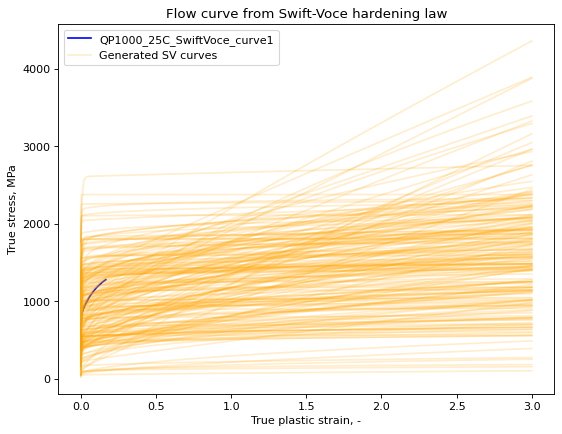

In [85]:
sim = MOO_SIM(info)
print(info['paramConfig'])
paramsDict = sim.latin_hypercube_sampling()
flowCurve = pd.read_csv("MOO_targets/QP1000_25C_SwiftVoce_curve1/flowCurve.csv")
strain= flowCurve["strain/-"]
stress= flowCurve["stress/MPa"]
print(paramsDict)
truePlasticStrain = info['truePlasticStrain']
# Plot the flow curve
figure(figsize=(8, 6), dpi=80)
plt.title("Flow curve from Swift-Voce hardening law")
plt.xlabel("True plastic strain, -")
plt.ylabel("True stress, MPa")
plt.plot(strain, stress, color="blue", label="QP1000_25C_SwiftVoce_curve1")
for param in paramsDict:
    trueStress = SwiftVoce(param["c1"], param["c2"], param["c3"], param["c4"], param["c5"], param["c6"], param["c7"], truePlasticStrain)
    plt.plot(truePlasticStrain, trueStress, color="orange", alpha=0.2)
plt.plot([], [], color="orange", alpha=0.2, label="Generated SV curves")
plt.legend()
#plt.xlim(0, 0.3)
np.save("parameters.npy", paramsDict)
print(len(paramsDict))